<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Bastián Felipe Sepúlveda Espinoza

__Rol__: 201630001-5

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [1]:
!cat data/Readme.txt

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

mean_integrated_profile  std_integrated_profile  \
0               140.562500               55.683782   
1               102.507812               58.882430   
2               103.015625               39.341649   
3               136.750000               57.178449   
4                88.726562               40.672225   

   excess_kurtosis_integrated_profile  skewness_integrated_profile  \
0                           -0.234571                    -0.699648   
1                            0.465318                    -0.515088   
2                            0.323328                     1.051164   
3                           -0.068415                    -0.636238   
4                            0.600866                     1.123492   

   mean_dmsnr  std_dmsnr  excess_kurtosis_dmsnr  skewness_dmsnr  is_pulsar  
0    3.199833  19.110426               7.975532       74.242225          0  
1    1.677258  14.860146              10.576487      127.393580          0  
2    3.121237  21.744669               7.735822       63.171909          0  
3    3.642977  20.959280               6.896499       53.593661          0  
4    1.178930  11.468720              14.269573      252.567306          0

<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

#### Columnas

* Media del Perfil Integrado:
$$\frac{1}{n}\sum_{i=1}^np_i$$

* Desviación Estándar del Perfil Integrado
$$\sqrt{\frac{\sum_{i=1}^n(p_i-\bar{P})^2}{n-1}}$$

* Exceso de Curtosis del Perfil Integrado
$$\frac{\frac{1}{n}\sum_{i=1}^n(p_i-\bar{P})^4}{(\frac{1}{n}\sum_{i=1}^n(p_i-\bar{P})^2)^2}-3$$

* Asimetría del Perfil Integrado
$$\frac{\frac{1}{n}\sum_{i=1}^n(p_i-\bar{P})^3}{(\sqrt{\frac{1}{n}\sum_{i=1}^n(p_i-\bar{P})^2})^3}$$

* Media de la Curva DM-SNR
$$\frac{1}{n}\sum_{i=1}^nd_i$$

* Desviación Estándar de la Curva DM-SNR
$$\sqrt{\frac{\sum_{i=1}^n(d_i-\bar{D})^2}{n-1}}$$

* Exceso de Curtosis de la Curva DM-SNR
$$\frac{\frac{1}{n}\sum_{i=1}^n(d_i-\bar{D})^4}{(\frac{1}{n}\sum_{i=1}^n(d_i-\bar{D})^2)^2}-3$$

* Asimetría de la Curva DM-SNR
$$\frac{\frac{1}{n}\sum_{i=1}^n(d_i-\bar{D})^3}{(\sqrt{\frac{1}{n}\sum_{i=1}^n(d_i-\bar{D})^2})^3}$$

In [92]:
df.describe().T

count        mean         std  \
mean_integrated_profile             17898.0  111.079968   25.652935   
std_integrated_profile              17898.0   46.549532    6.843189   
excess_kurtosis_integrated_profile  17898.0    0.477857    1.064040   
skewness_integrated_profile         17898.0    1.770279    6.167913   
mean_dmsnr                          17898.0   12.614400   29.472897   
std_dmsnr                           17898.0   26.326515   19.470572   
excess_kurtosis_dmsnr               17898.0    8.303556    4.506092   
skewness_dmsnr                      17898.0  104.857709  106.514540   
is_pulsar                           17898.0    0.091574    0.288432   

                                          min         25%         50%  \
mean_integrated_profile              5.812500  100.929688  115.078125   
std_integrated_profile              24.772042   42.376018   46.947479   
excess_kurtosis_integrated_profile  -1.876011    0.027098    0.223240   
skewness_integrated_profile         -1.791886   -0.188572    0.198710   
mean_dmsnr                           0.213211    1.923077    2.801839   
std_dmsnr                            7.370432   14.437332   18.461316   
excess_kurtosis_dmsnr               -3.139270    5.781506    8.433515   
skewness_dmsnr                      -1.976976   34.960504   83.064556   
is_pulsar                            0.000000    0.000000    0.000000   

                                           75%          max  
mean_integrated_profile             127.085938   192.617188  
std_integrated_profile               51.023202    98.778911  
excess_kurtosis_integrated_profile    0.473325     8.069522  
skewness_integrated_profile           0.927783    68.101622  
mean_dmsnr                            5.464256   223.392140  
std_dmsnr                            28.428104   110.642211  
excess_kurtosis_dmsnr                10.702959    34.539844  
skewness_dmsnr                      139.309331  1191.000837  
is_pulsar                             0.000000     1.000000

Se puede apreciar que son pocos los elementos que efectivamente son púlsares.

<a id='visualization'></a>

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [5]:
import altair as alt
import matplotlib.pyplot as plt

alt.themes.enable("opaque")

%matplotlib inline

In [84]:
alt.data_transformers.disable_max_rows()
redable_index_names={'mean_integrated_profile': 'Media del Perfil Integrado',
 'std_integrated_profile': 'Desviación Estándar del Perfil Integrado',
 'excess_kurtosis_integrated_profile': 'Exceso de Curtosis del Perfil Integrado',
 'skewness_integrated_profile': 'Asimetría del Perfil Integrado',
 'mean_dmsnr': 'Media de la Curva DM-SNR',
 'std_dmsnr': 'Desviación Estándar de la Curva DM-SNR',
 'excess_kurtosis_dmsnr': 'Exceso de Curtosis de la Curva DM-SNR',
 'skewness_dmsnr': 'Asimetría de la Curva DM-SNR'}

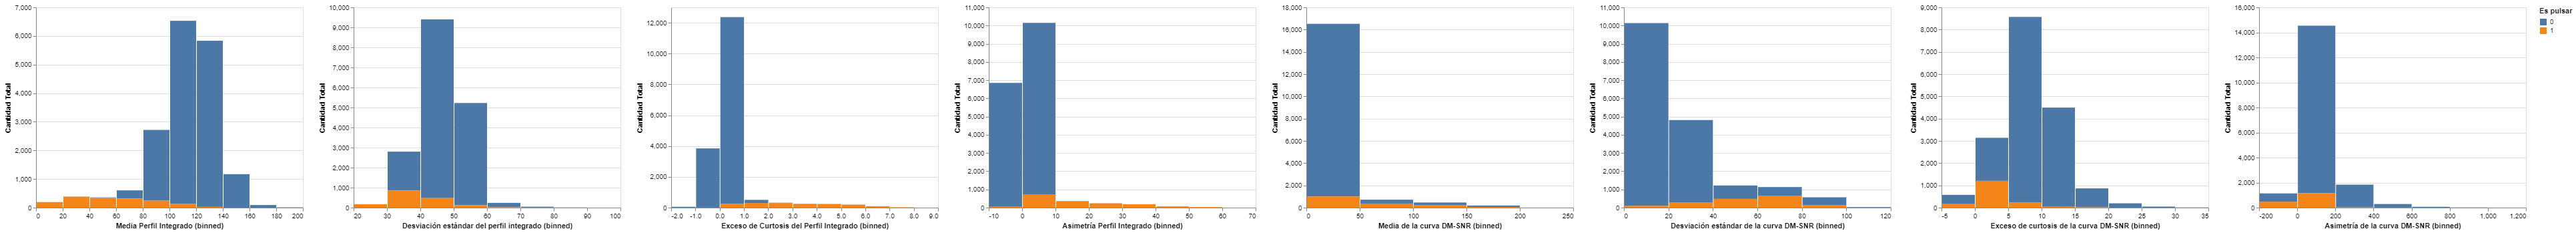

In [83]:
alt.Chart(df.rename(columns=redable_index_names)).mark_bar().encode(
    alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=10)),
    alt.Y('count()', type='quantitative', title='Cantidad Total'),
    alt.Color('is_pulsar:N', title='Es pulsar')
).repeat(
    column=list(redable_index_names.values()),
    title=alt.Title('Histogramas por Estadística')
)

In [85]:
alt.Chart(df.rename(columns=redable_index_names)).mark_circle().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    alt.Color('is_pulsar:N')
).properties(
    width=100,
    height=100
).repeat(
    column=list(redable_index_names.values()),
    row=list(redable_index_names.values()),
    title=alt.Title('Gráficos de Comparación entre las Estadísticas')
)

AttributeError: module 'altair' has no attribute 'Title'

<a id='preprocessing'></a>

In [9]:
correlation = np.zeros((8,8))

for i in range(8):
   for j in range(8):
        correlation[i][j] = df.iloc[:,i].corr(df.iloc[:,j])

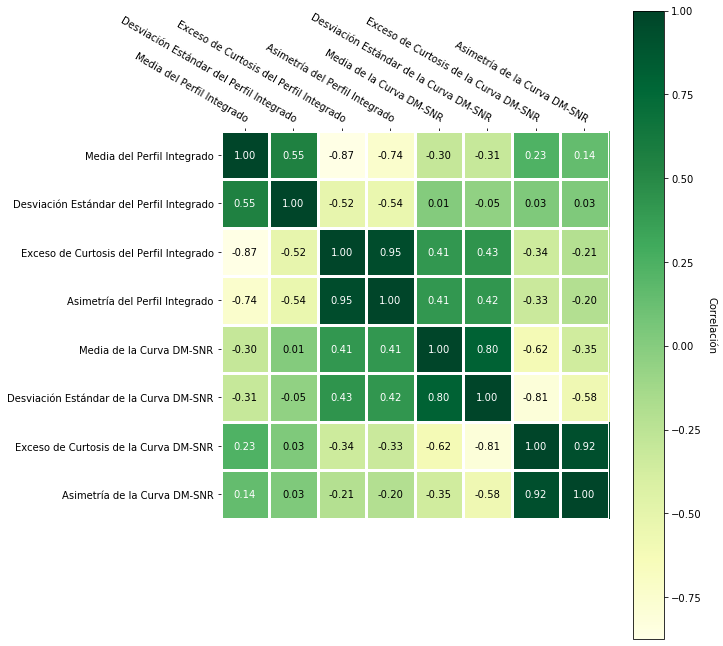

In [94]:
from mpl_heatmap import heatmap, annotate_heatmap

fig, ax = plt.subplots(figsize=(10, 10))

im, cbar = heatmap(correlation, list(redable_index_names.values()), list(redable_index_names.values()), ax=ax, cmap="YlGn", cbarlabel="Correlación")

texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
X_raw = np.array(df.drop('is_pulsar',axis=1))
y = np.array(df['is_pulsar'])

In [13]:
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [96]:
print(f'La variable X posee media {np.mean(X):2f} y desviación estándar {np.std(X)}')

La variable X posee media 0.000000 y desviación estándar 1.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [17]:
logistic = LogisticRegression().fit(X_train, y_train)
logistic_cv = cross_validate(logistic, X_test, y_test, cv=10, scoring='precision')

In [18]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.2f} +/- {np.std(logistic_cv["test_score"]):.2f}')

Logistic Regression Cross Validation precision score: 0.94 +/- 0.07


<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [21]:
parameters = np.arange(2,15)
knn_gscv = GridSearchCV(KNeighborsClassifier(), {"n_neighbors":parameters}, cv=10, scoring='precision').fit(X_train,y_train)
knn = knn_gscv.best_params_['n_neighbors']

2

In [22]:
best_knn = KNeighborsClassifier(n_neighbors=knn)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [23]:
knn_cv = cross_validate(best_knn,X_test,y_test,cv=10,scoring='precision')

In [24]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.2f} +/- {np.std(knn_cv["test_score"]):.2f} with train data.')

KNN Cross Validation precision score: 0.97 +/- 0.04 with train data.


<a id='free_style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

In [26]:
from sklearn import svm

In [27]:
alpha_array = np.arange(1,20)
alpha_gscv = GridSearchCV(svm.SVC(), {'C':alpha_array}, cv=10, scoring='precision').fit(X_train,y_train)

In [33]:
best_svc = svm.SVC(C=alpha_gscv.best_params_['C']).fit(X_train,y_train)

In [34]:
my_model_cv = cross_validate(best_svc,X_test,y_test,cv=10,scoring='precision')

In [97]:
print(f'SVC Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

SVC Cross Validation precision score: 0.93 +/- 0.06 with train data.


<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

In [41]:
from sklearn.metrics import precision_score, classification_report

In [42]:
print(f'Logistic Regression test precision score: {precision_score(y_test,logistic.predict(X_test))}')

Logistic Regression test precision score: 0.9357142857142857


In [43]:
print(f'KNN test precision score: {precision_score(y_test,best_knn.predict(X_test))}')

KNN test precision score: 0.9496402877697842


In [44]:
print(f'MY MODEL test precision score: {precision_score(y_test,best_svc.predict(X_test))}')

MY MODEL test precision score: 0.9574468085106383


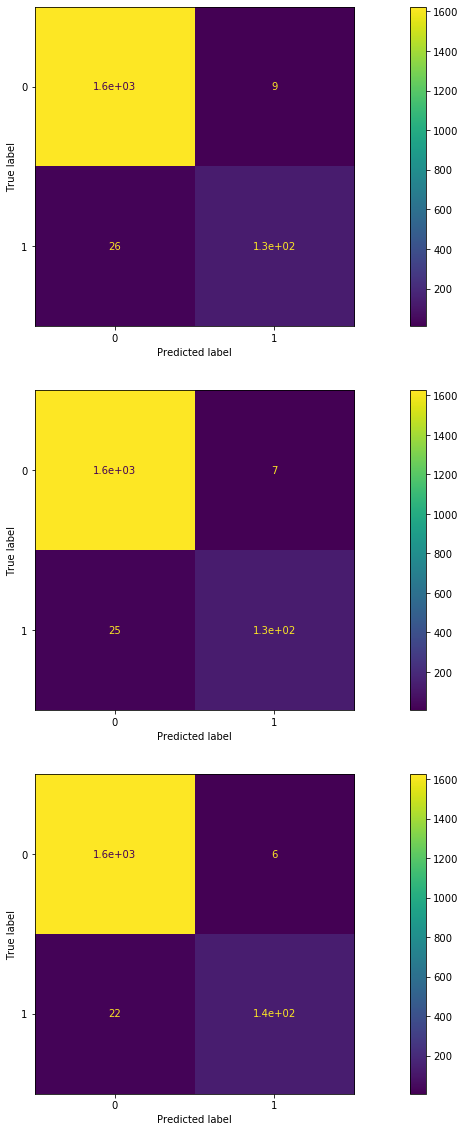

In [52]:
from sklearn.metrics import plot_confusion_matrix

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,20))

plot_confusion_matrix(logistic, X_test, y_test, ax=ax1)
plot_confusion_matrix(best_knn, X_test, y_test, ax=ax2)
plot_confusion_matrix(best_svc, X_test, y_test, ax=ax3)

In [55]:
cross_validate(logistic,X_test,y_test,cv=10,scoring='precision')['fit_time']

array([0.02645755, 0.02827024, 0.02808332, 0.03033113, 0.02986646,
       0.01727223, 0.01562452, 0.02762055, 0.02749443, 0.01562262])

<a id='conclusions'></a>

In [65]:
print(f'Logistic Regression test precision score: {np.mean(cross_validate(logistic,X_test,y_test,cv=10,scoring="precision")["fit_time"])} +/- {np.std(cross_validate(logistic,X_test,y_test,cv=10,scoring="precision")["fit_time"])}')
print(f'Logistic Regression test precision score: {np.mean(cross_validate(best_knn,X_test,y_test,cv=10,scoring="precision")["fit_time"])} +/- {np.std(cross_validate(best_knn,X_test,y_test,cv=10,scoring="precision")["fit_time"])}')
print(f'Logistic Regression test precision score: {np.mean(cross_validate(best_svc,X_test,y_test,cv=10,scoring="precision")["fit_time"])} +/- {np.std(cross_validate(best_svc,X_test,y_test,cv=10,scoring="precision")["fit_time"])}')

Logistic Regression test precision score: 0.026700568199157716 +/- 0.008799372977086153
Logistic Regression test precision score: 0.006943464279174805 +/- 0.007587065994710494
Logistic Regression test precision score: 0.027146673202514647 +/- 0.007360057970823435


In [66]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [67]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

<module 'matplotlib.pyplot' from 'C:\\Users\\basti\\Miniconda3\\envs\\mat281\\lib\\site-packages\\matplotlib\\pyplot.py'>

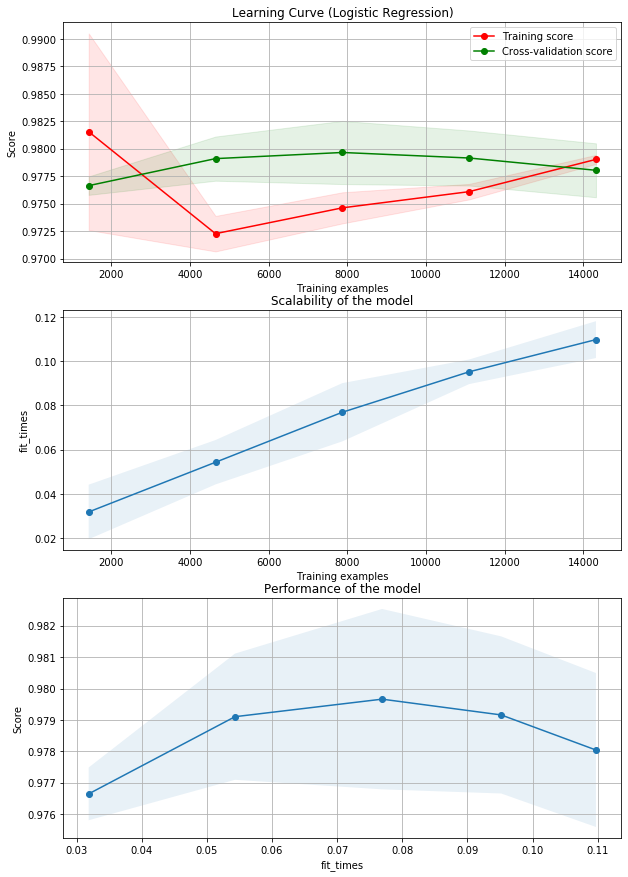

In [75]:
fig, axes1 = plt.subplots(3, 1, figsize=(10, 15))

title1 = "Learning Curve (Logistic Regression)"
plot_learning_curve(logistic, title1, X, y, axes=axes1[:], n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\basti\\Miniconda3\\envs\\mat281\\lib\\site-packages\\matplotlib\\pyplot.py'>

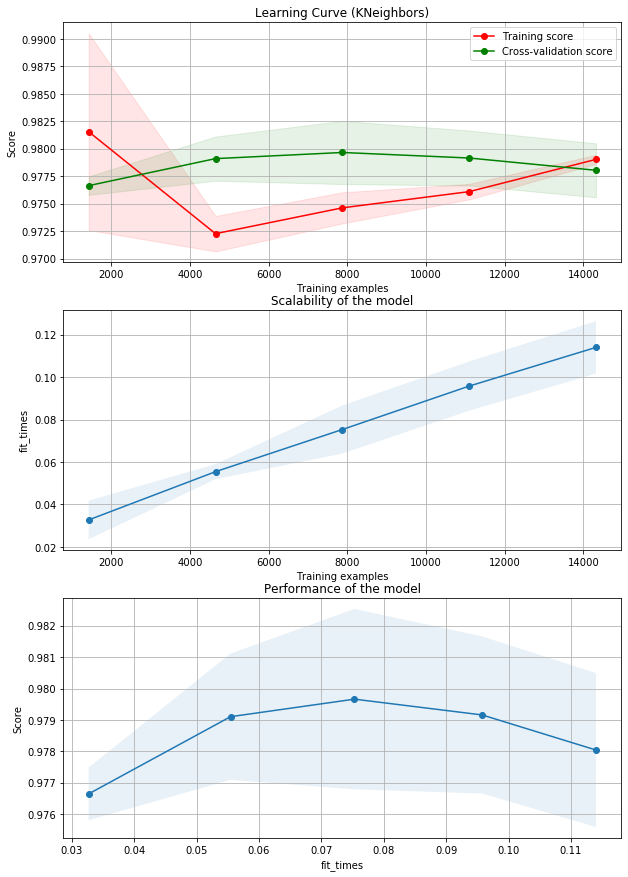

In [77]:
fig, axes2 = plt.subplots(3, 1, figsize=(10, 15))

title2 = "Learning Curve (K Nearest Neighbors)"
plot_learning_curve(logistic, title2, X, y, axes=axes2[:], n_jobs=4)

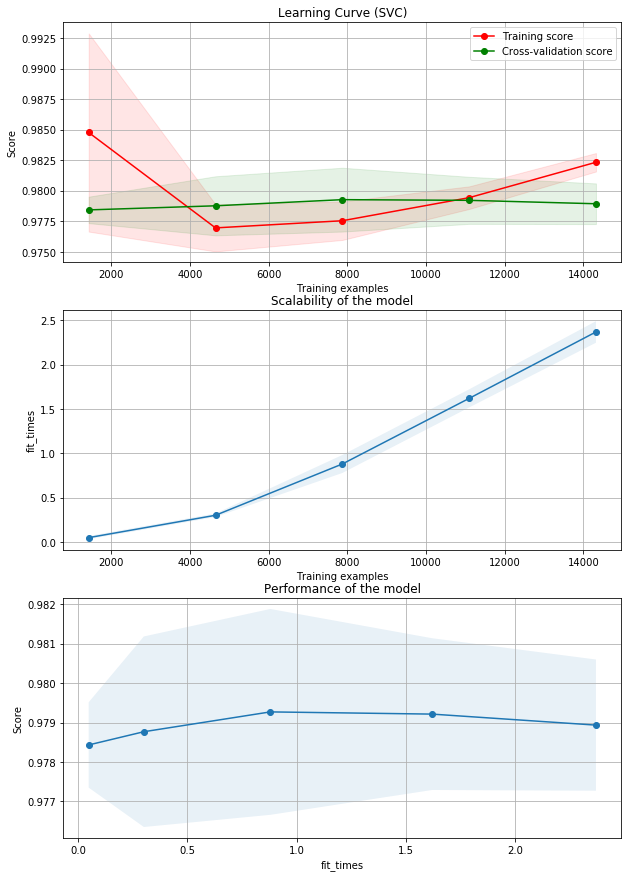

In [78]:
fig, axes3 = plt.subplots(3, 1, figsize=(10, 15))

title3 = "Learning Curve (SVC)"
plot_learning_curve(best_svc, title3, X, y, axes=axes3[:], n_jobs=4)

plt.show()

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.

* ¿Cuál modelo tiene mejor _precision_?

El modelo que posee una mejor precisión es SVC.

* ¿Cuál modelo demora menos tiempo en ajustarse?

El model que menos demora en ejecutarse es K Nearest Neighbors.

* ¿Qué modelo escoges?

Basado en el puntaje score y en el tiempo de ejecución se escoge el modelo SCV.

* ¿Por qué utilizar _precision_ y no otro score?

Precision facilita el aprendizaje del modelo, puesto que la variable 'is_pulsar' es binaria.

* Trabajos Futuros

Podrían analizarse más modelos de clasificación, con el propósito de verificar cuál es el que mejor se comporta para estos datos en específico.

* Dificultades

El hecho de que la data sea tan grande hace que sea un poco más difícil de trabajar, pues aumentan los tiempos de ejecución.